https://machinelearningmastery.com/feature-selection-time-series-forecasting-python/

How to create and interpret a correlogram of lagged observations.  
How to calculate and interpret feature importance scores for time series features.  
How to perform feature selection on time series input variables.

In [33]:
from pandas import Series
from matplotlib import pyplot

In [44]:
ts = Series.from_csv('car-sales.csv', sep=";", header=0)

In [46]:
ts.head()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Monthly car sales in Quebec 1960-1968, dtype: int64

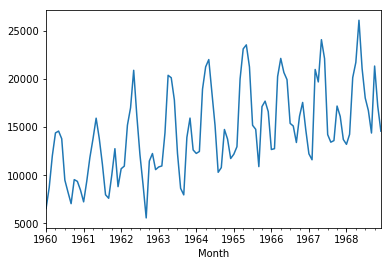

In [45]:
%matplotlib inline
ts.plot()

## Make Stationary

In [48]:
differenced = ts.diff(12)

In [50]:
# trim off the first year of empty data
differenced = differenced[12:]

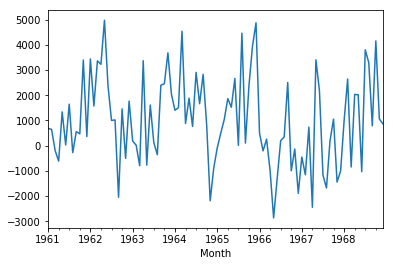

In [51]:
differenced.plot()

## AutoCorrelation Plot

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

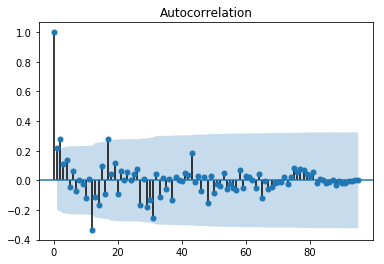

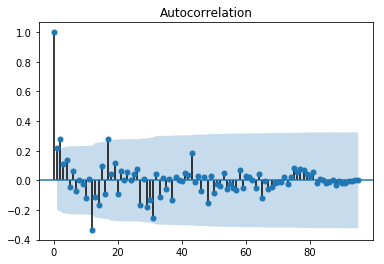

In [54]:
plot_acf(differenced)

These show the correlation of each lagged observation and whether or not the correlation is statistically significant.The dots above the blue area indicate statistical significance. The correlation of 1 for the lag value of 0 indicates 100% positive correlation of an observation with itself. The plot shows significant lag values at 1, 2, 12, and 17 months.

## Supervised Learning

The example below creates a new time series with 12 months of lag values to predict the current observation.

In [61]:
from pandas import DataFrame

In [92]:
dataframe = DataFrame()
for i in range(12, 0, -1):
    dataframe['t-'+str(i)] = differenced.shift(i)
dataframe['t'] = differenced.values

In [93]:
print(dataframe.head(15))

             t-12   t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Month                                                                      
1961-01-01    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1961-02-01    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1961-03-01    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1961-04-01    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1961-05-01    NaN    NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1961-06-01    NaN    NaN     NaN     NaN     NaN     NaN     NaN   687.0   
1961-07-01    NaN    NaN     NaN     NaN     NaN     NaN   687.0   646.0   
1961-08-01    NaN    NaN     NaN     NaN     NaN   687.0   646.0  -189.0   
1961-09-01    NaN    NaN     NaN     NaN   687.0   646.0  -189.0  -611.0   
1961-10-01    NaN    NaN     NaN   687.0   646.0  -189.0  -611.0  1339.0   
1961-11-01    NaN    NaN   687.0   646.0  -189.0  -611.0  1339.0    30.0   
1961-12-01  

In [94]:
#The first 12 col contains NaN
dataframe = dataframe[13:]

## Feature Importance of Lag Variables

In [95]:
array = dataframe.values

In [96]:
X = array[:,0:-1]
y = array[:,-1]

In [97]:
from sklearn.ensemble import RandomForestRegressor
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)

[ 0.21642244  0.06271259  0.05662302  0.05543768  0.07155573  0.08478599
  0.07699371  0.05366735  0.1033234   0.04897883  0.1066669   0.06283236]


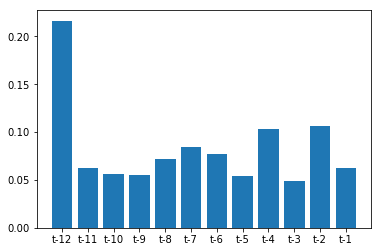

In [99]:
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

The plot shows the high relative importance of the observation at t-12 and, to a lesser degree, the importance of observations at t-2 and t-4.

## Feature Selection of Lag Variables

Recursive Feature Selection (RFE).

RFE works by creating predictive models, weighting features, and pruning those with the smallest weights, then repeating the process until a desired number of features are left.

Selected Features:
t-12
t-6
t-4
t-2


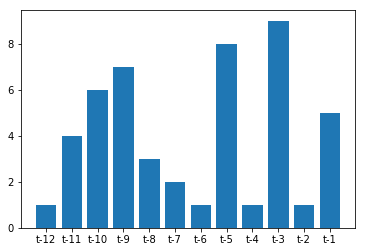

In [100]:
from sklearn.feature_selection import RFE
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()